### Diabetes Prediction Using Machine Learning

Aim: A Python based Machine Learning based program to check whether a person is likely to have diabetes or not.

### About The Dataset

#### Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It is provided courtesy of the Pima Indians Diabetes Database and is available on Kaggle.It consists of several medical predictor variables and one target variable, Outcome. Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The dataset has 9 columns as shown below;

#### Content:

Pregnancies               – Number of times pregnant

Glucose                   – Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure             – Diastolic blood pressure (mm Hg)

SkinThickness             – Triceps skinfold thickness (mm)

Insulin                   – 2-Hour serum insulin (mu U/ml)

BMI                       – Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction  – Diabetes pedigree function

Age                       – Age (years)

Outcome                   – Class variable (0 or 1) 268 of 768 are 1, the others are 0

#### Problem Statement

This is a Classification problem,the objective is to predict whether a patient has diabetes or not,so Outcome is target
variable to predict and the prediction is done based on the meaning given below.

0 – Absence of Diabetes

1 – Presence of Diabetes

In [1]:
#Importing the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
import warnings
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
warnings.simplefilter("ignore")
import os

In [2]:
#Reading the Dataset
os.chdir(r"C:\Users\shameel\Downloads")
df = pd.read_csv("diabetes.csv")

In [3]:
# number of rows and columns
df.shape

(768, 9)

#### Exploratory data analysis:

In [4]:
#first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# checking if there is any null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the above information we can see that there is no null values.

In [6]:
# describing the dataset statistically
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


we can see that there are 0 values for Glucose, BllodPressure, SkinThickness, Insulin, BMI Which cannot be correct. So, needs to be treated.

So from the Above observations we can tell that the following feature have invalid zero value :

1)Glucose

2) BloodPressure

3) SkinThickness

4) Insulin

5) BMI

### Data Manipulation:

So We will have to replace the 0's in the above columns with Nan so that we can see the number of invalid values and replace them with the appropriate values

In [7]:
#replacing 0 to nan
df1 = df.copy()
df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

now plotting a histogram so that we can see the distribution of the features and then come to a conclusion whether to replace the zero's with mean or median

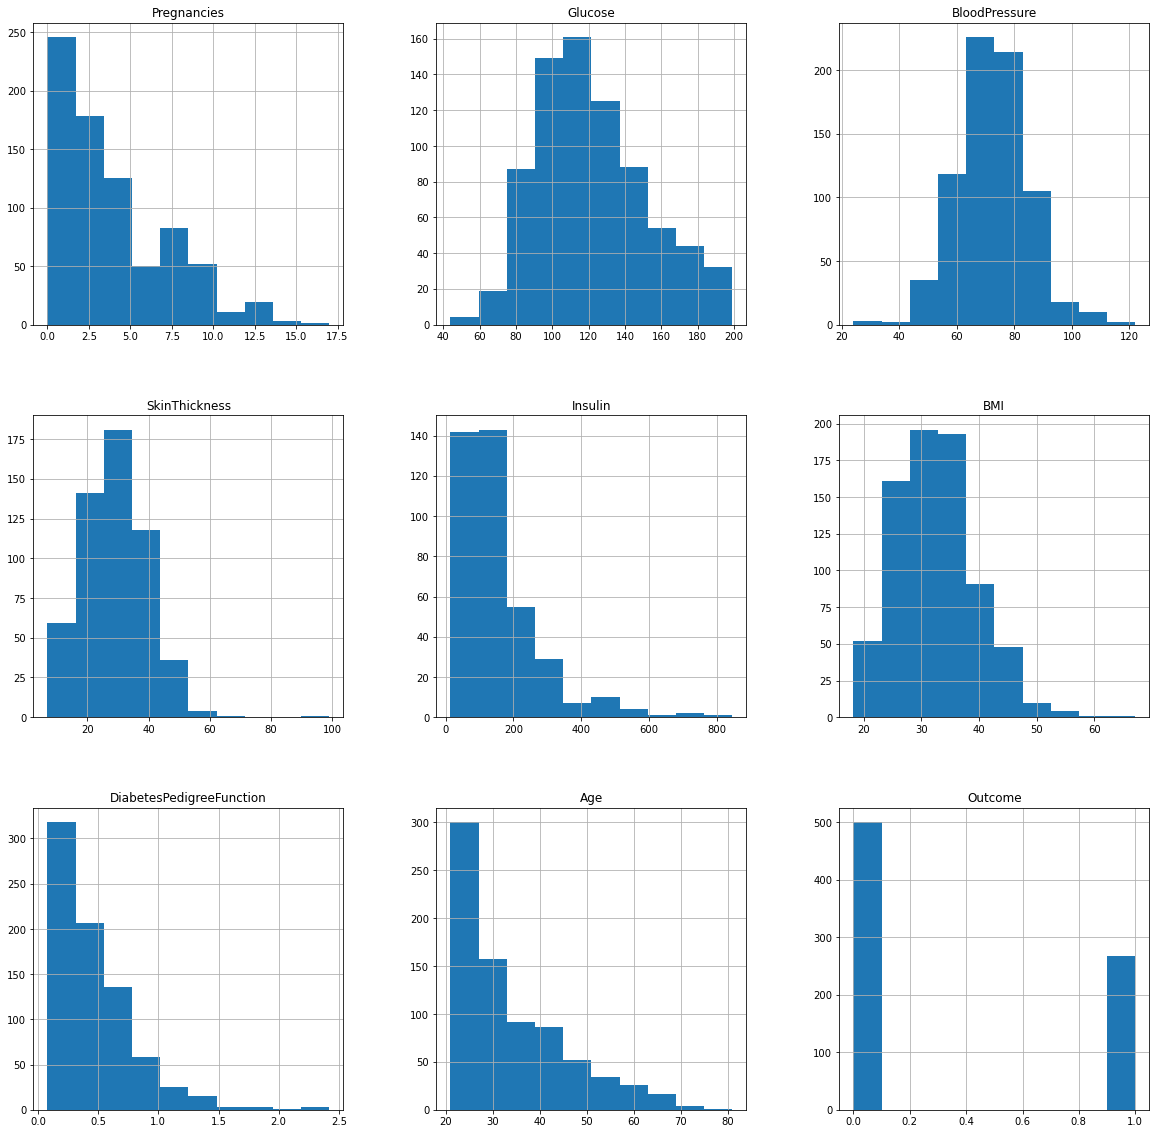

In [8]:
hist = df1.hist(figsize = (20,20))

we can see that SkinThickness, Insulin, BMI have skewed distribution.

In [9]:
# replacing the nan values with appropriate values
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace = True)
df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)
df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

In [10]:
# all the nan values has be replaced
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

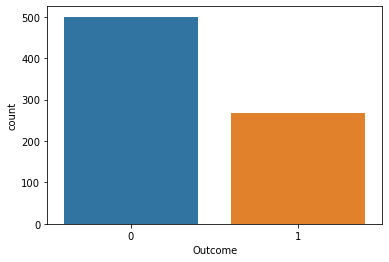

In [11]:
sns.countplot(x='Outcome',data = df)

In the Outcome column 1 represents diabetes possitive and 0 represent diabetes negative so , We can See That the Number of people with no diabetes are more than people with diabetes

In [12]:
#mean value for all the features based on the outcome
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


We can observe few relation between the target and predictor with the above data:

1) You can see that people with high glucose level are mostly diabetic

2) The aged person are more susceptible to get diabetes

3) people with more BMI are more susceptible to get diabetes

### Univariate Analysis :

#### Histogram

To check whether the distribution is Skewed or normally distributed

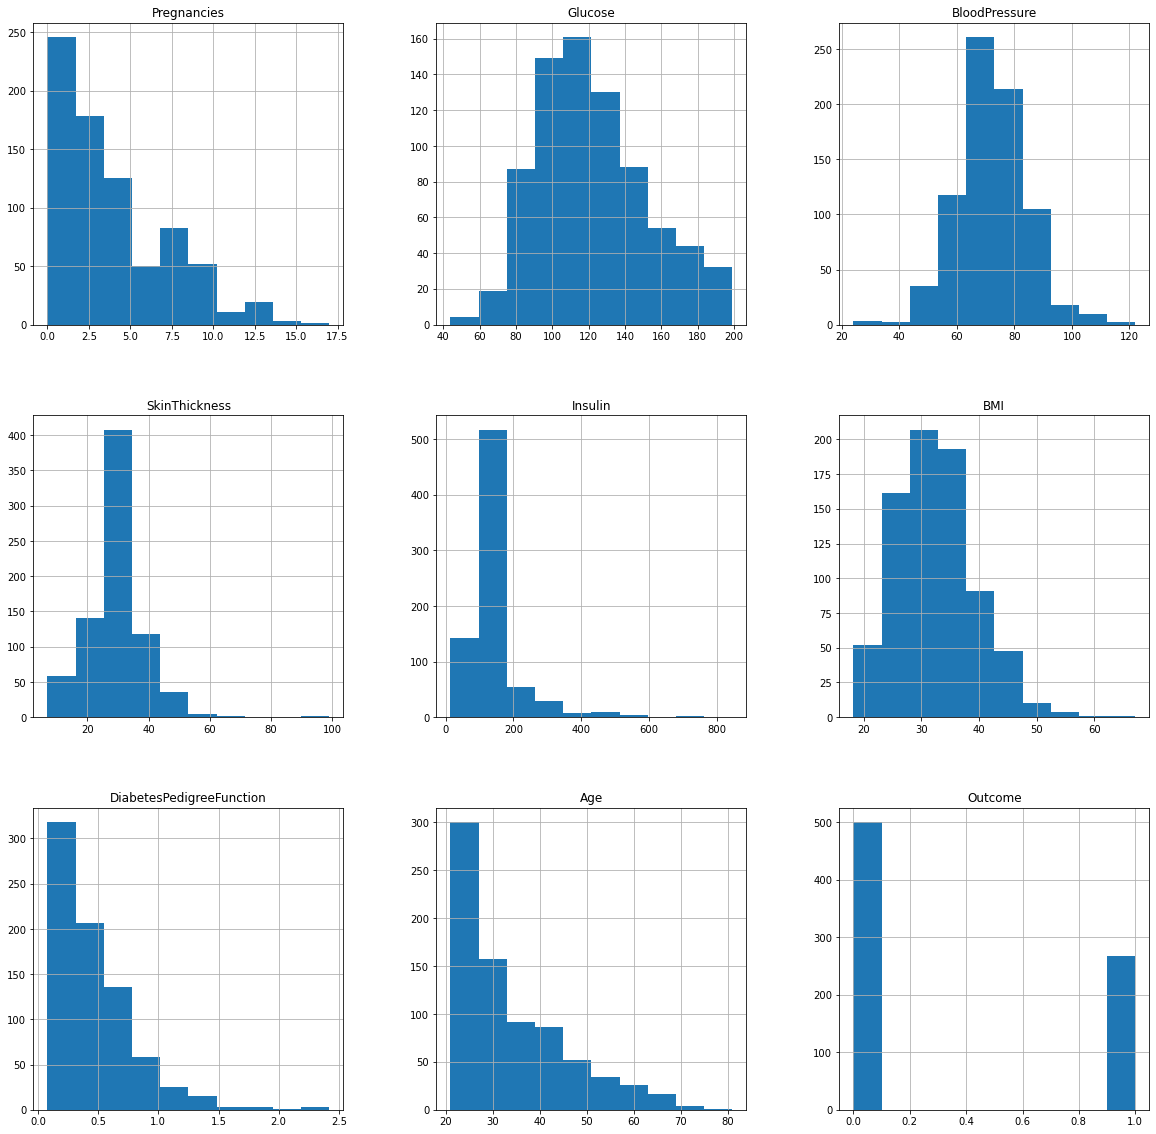

In [13]:
#Plotting the Histogram for all the features after replacing NA
hist = df1.hist(figsize=(20,20))

Interpretation from above Graphs :

1) Age and Insulin columns are highly right skewed.

2) Dataset contains more number of people between the age of 20-40 years.

3) Large number of people have blodd preasure between 50 and 100 mmHg

4) Lot of people have glucose levels between 100 and 200 mg/dL. People with Glucose levels between 140mg/dL and 199mg/dL   are considered to be prediabetic

5) There are a lot of people in the BMI range of 20 and 50. A healthy adult should have a BMI between 18.5 and 24.9. This dataset obviously has many people who are either overweight or obese

### Bivariate Analysis

#### Scatter Plot:


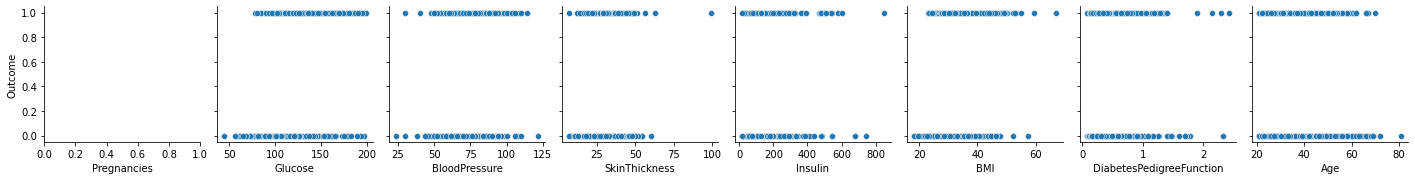

In [14]:
# plotting scatter plt for Outcome vs All the other predictors
sns.pairplot(data=df1,
             x_vars=(df1.drop(['Outcome'], axis=1)).columns,
             y_vars=['Outcome'],
             kind='scatter')

PairPlot is a great way to observe scatterolot of all the variables

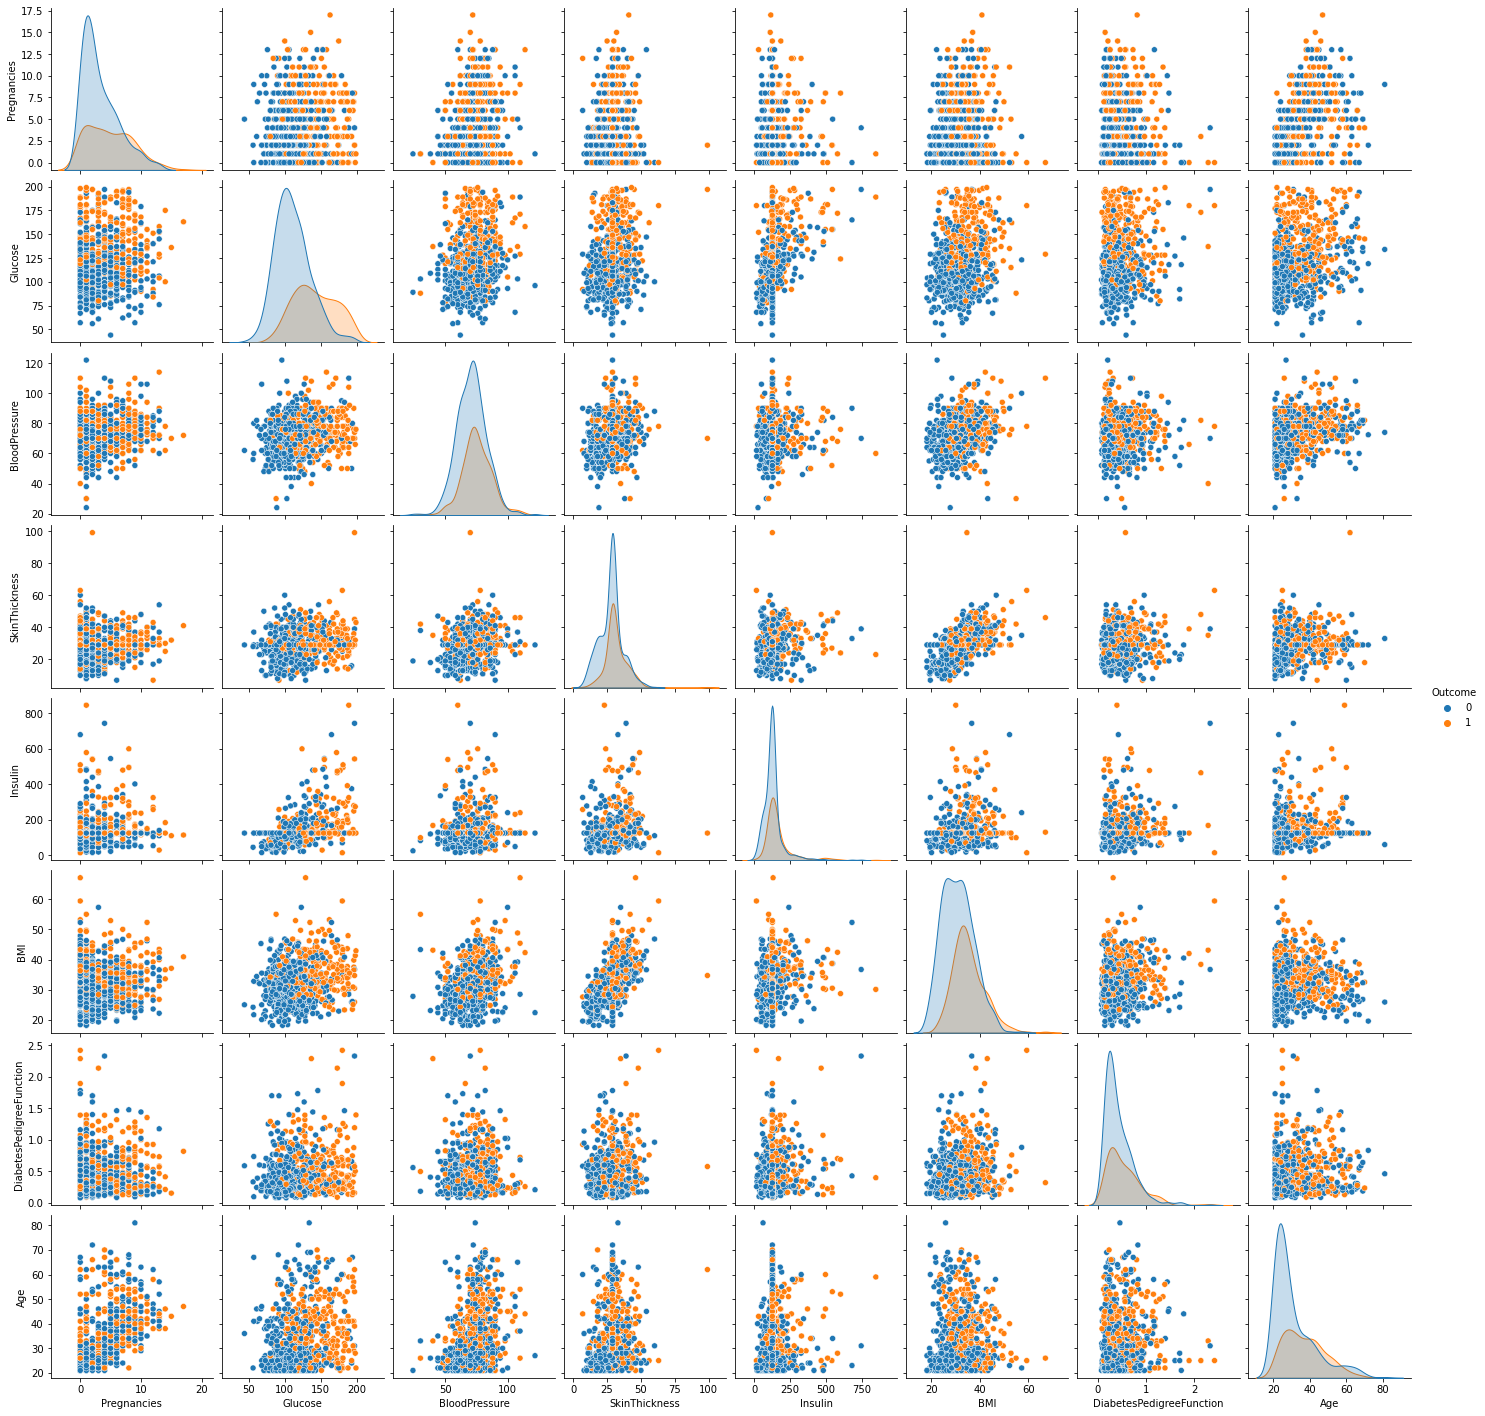

In [15]:
# scatter plot for all the variable
sns.pairplot(data = df1,hue = 'Outcome')
plt.show()

#### HeatMap :

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heat Map For Uncleaned Data :

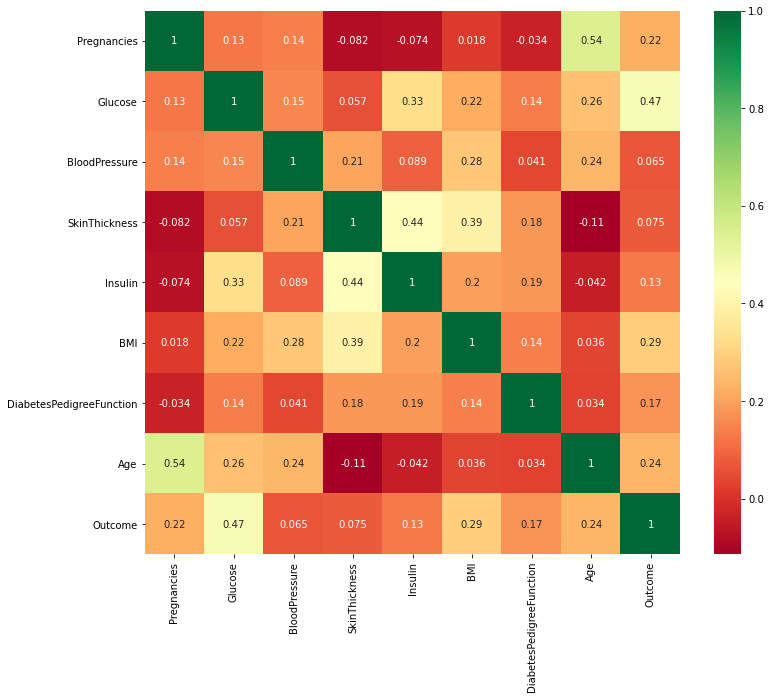

In [16]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Heat Map For cleaned Data :

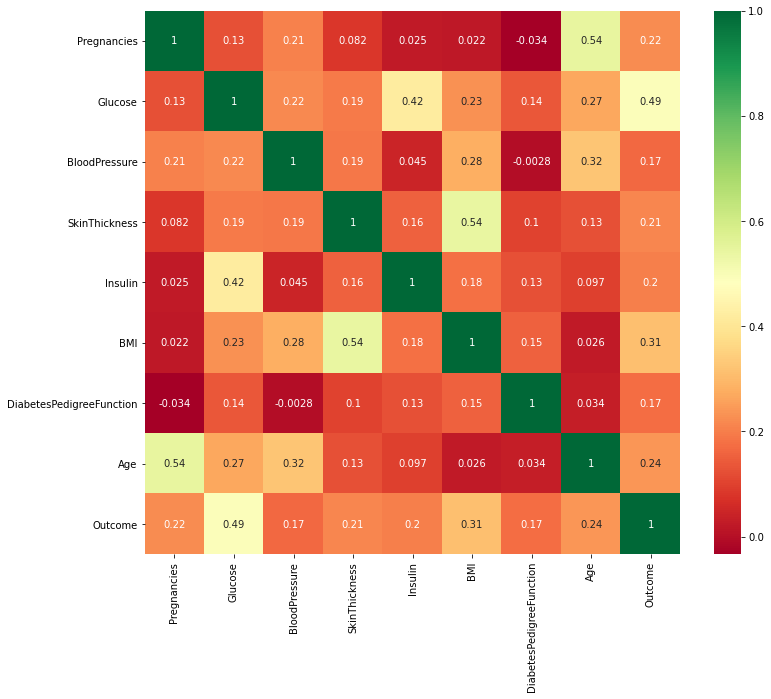

In [17]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

You can notice That After cleaning the Data you can notice a increase in corelation between outcome and BMI and outcome and Glucose

### Initial model fitting setup

In [18]:
#defining the Dependent and independent variables
x = df1.drop(['Outcome'],axis=1)
y = df1[['Outcome']]

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [20]:
# preprocessing the data and splitting
scaler = preprocessing.MinMaxScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [21]:
# dimension of train and test data
print('shape of xtrain is {}'.format(x_train.shape))
print('shape of xtest is {}'.format(x_test.shape))
print('shape of ytrain is {}'.format(y_train.shape))
print('shape of ytest is {}'.format(y_test.shape))

shape of xtrain is (614, 8)
shape of xtest is (154, 8)
shape of ytrain is (614, 1)
shape of ytest is (154, 1)


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#fitting the RandomForestClassifier model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
prediction3 = rfc.predict(x_test)

In [24]:
#finding the overall accuracy of the prediction made by the model
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[78 21]
 [16 39]]


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



### Hyperparameter Tuning for Random Forest 

In [53]:
# parameters definition
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num=10)] 
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

In [54]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [55]:
#defining Gridsearch using the given parameters and the model used
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=10, n_jobs = 4)

In [56]:
# fitting grid search and finding the best parameter fit
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 440 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 1080 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done 1976 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 2564 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  2.3min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=3)

In [57]:
#predicting Y_test values
prediction32 = grid_search.predict(x_test)

In [58]:
#calculating the accuracy of the model after hyper parameter tuning
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction32))
print("\n")
print(classification_report(y_test, prediction32))

Confusion Matrix: 
 [[83 16]
 [20 35]]


              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



Hyperparameter Tuning didnt help much in this case.

### Decision Tree

In [51]:
#defining the decitionTreeclassifier and fitting it
detree = DecisionTreeClassifier()
detree.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
prediction2 = detree.predict(x_test)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

Confusion Matrix:
 [[74 25]
 [21 34]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.58      0.62      0.60        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.70      0.70       154



### Hyperparameter Tuning for Desicion Tree

In [46]:
#defining the parameters
param_grid = { "min_samples_split":[1,2,3,4,5,6,None],
 "min_samples_leaf":[1,2,3,4,5,6,None],
 'max_depth' : [1,2,3,4,5,6,None]}

In [47]:
#iniating grid search using the parameters above and fitting the model with best parameters
grid  = GridSearchCV(detree ,param_grid = param_grid ,cv = 5, n_jobs = -1, verbose = 0, return_train_score=True )
grid.fit(x_train,y_train)
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=4)


In [48]:
#predicting Y_test values
prediction22 = grid.predict(x_test)

In [49]:
#finding the accuracy
print("Confusion Matrix: \n", confusion_matrix(y_test, prediction22))
print("\n")
print(classification_report(y_test, prediction22))

Confusion Matrix: 
 [[83 16]
 [21 34]]


              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



Hyper Parameter Tuning Helped us to increase the accuracy in this case

### Logistic Regression

In [37]:
#importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
# fitting the model
lreg = LogisticRegression(max_iter=200)
lreg.fit(x_train, y_train)
prediction1 = lreg.predict(x_test)

In [39]:
#finding the accuracy
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction1))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction1))

Confusion Matrix:
 [[87 12]
 [22 33]]


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [59]:
#comparing accuracy score of all the three models
print('The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, prediction1)*100,'%')
print('The accuracy score of Desiccion Tree Model is: ', accuracy_score(y_test, prediction22)*100,'%')
print('The accuracy score of Random Forests Model is: ', accuracy_score(y_test, prediction32)*100,'%')

The accuracy score of Logistic Regression Model is:  77.92207792207793 %
The accuracy score of Desiccion Tree Model is:  75.97402597402598 %
The accuracy score of Random Forests Model is:  76.62337662337663 %


In [60]:
# storing the accuracy score to plot a graph and comparing them
lr_acc = accuracy_score(y_test, prediction1)
dtc_acc = accuracy_score(y_test, prediction22)
rfc_acc = accuracy_score(y_test, prediction32)

In [61]:
model = ['Logistic Regression', 'Decision Tree', 'Random Forests']
score = [lr_acc, dtc_acc, rfc_acc]

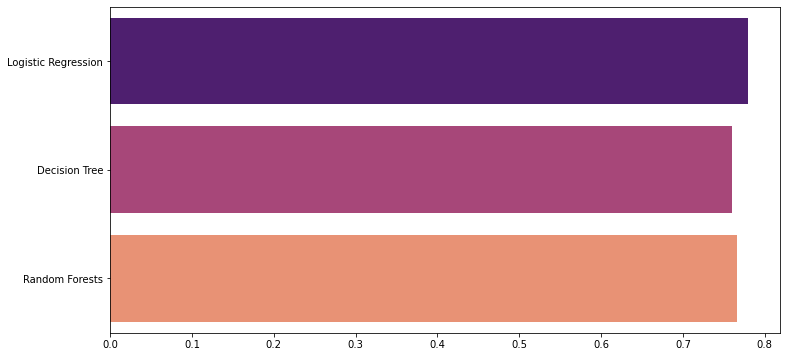

In [62]:
plt.figure(figsize = (12, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()

From The Above Graph We can Conclude That Logistic regression has the greatest accuracy of 77.92% for this dataset 

### Predicting The Diabetes for all the Test data using Logistic Regression

In [64]:
# fit the model in train and predicting the values for test data
lreg = LogisticRegression(max_iter=200)
lreg.fit(x_train, y_train)
prediction1 = lreg.predict(x_test)

In [65]:
# create a column of all the predicted price
x_test['pred_diabetes'] = prediction1

In [66]:
# create a column of all the Actual price
x_test['actual_diabetes'] = y_test

In [67]:
#compare the actual and predicted price
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_diabetes,actual_diabetes
668,0.352941,0.348387,0.346939,0.282609,0.211538,0.323108,0.150299,0.366667,0,0
324,0.117647,0.438710,0.520408,0.271739,0.133413,0.357873,0.029889,0.000000,0,0
624,0.117647,0.412903,0.408163,0.239130,0.133413,0.257669,0.034159,0.000000,0,0
690,0.470588,0.406452,0.571429,0.239130,0.133413,0.130879,0.332195,0.216667,0,0
473,0.411765,0.593548,0.673469,0.239130,0.133413,0.239264,0.056362,0.483333,0,0
...,...,...,...,...,...,...,...,...,...,...
355,0.529412,0.780645,0.653061,0.239130,0.133413,0.249489,0.095645,0.466667,1,1
534,0.058824,0.212903,0.326531,0.250000,0.050481,0.308793,0.500854,0.050000,0,0
344,0.470588,0.329032,0.489796,0.239130,0.133413,0.380368,0.173783,0.600000,0,0
296,0.117647,0.658065,0.469388,0.336957,0.415865,0.200409,0.110589,0.133333,0,1
